In [33]:
#dataframe, formatting
import pandas as pd
import datetime
import dateparser

#visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import altair as alt

#web scrapping
from bs4 import BeautifulSoup, SoupStrainer
import requests

#selenium did not work but will leave the libraries here in case it will ne beeded
#from selenium import webdriver
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC

import webbrowser

import folium
from urllib.request import urlopen
import matplotlib as mpl
import matplotlib.patches as mpatches
from folium import plugins

#### Extracting csv from web

- BEAUTIFULSOUP

In [ ]:
import requests  
import re
r = requests.get('http://www.gep.mtsss.gov.pt/indicadores-covid-19-mtsss')

from bs4 import BeautifulSoup  
soup = BeautifulSoup(r.text, 'html.parser') 
link = soup.findAll('a', attrs={'href': re.compile('/documents')})[0]

#changing beautifulsoup object to string
str_link = str(link)
#extracting the link from object
clean_link = re.findall('"([^"]*)"', str_link)[0]
website = 'http://www.gep.mtsss.gov.pt'
url = website+clean_link
url

In [ ]:
webbrowser.open(url)

In [2]:
data = pd.ExcelFile('Monitorizacao_COVID-19_MTSSS_3_junho_2020.xlsx')
#read multiple worksheets
all_my_sheets = [pd.read_excel(data, sheet_name) for sheet_name in data.sheet_names]

In [3]:
data.sheet_names

['Baixas por Isolamento',
 'Apoio à Familia',
 'Apoio à Familia - Lançamentos',
 'Layoff – Estimativa ',
 'Layoff – Estim. - CAE,Dim,Dist',
 'Redução de Actividade TI e MOE',
 'Despedimentos coletivos',
 'Inscrições no IEFP',
 'DES - SegSocial',
 'DES - Apoio Excepcional',
 'Prorrogação RSI']

#### Dados relevantes para análise do impacto da COVID-19 no mercado de trabalho:

In [4]:
df= {'Tab'  : data.sheet_names,
     'Relevant Y/N'     : ['Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N']}
relevant_data = pd.DataFrame(df)
relevant_data

,Tab,Relevant Y/N
0,Baixas por Isolamento,Y
1,Apoio à Familia,N
2,Apoio à Familia - Lançamentos,N
3,Layoff – Estimativa,Y
4,"Layoff – Estim. - CAE,Dim,Dist",Y
5,Redução de Actividade TI e MOE,Y
6,Despedimentos coletivos,Y
7,Inscrições no IEFP,N
8,DES - SegSocial,N
9,DES - Apoio Excepcional,N


In [5]:
relevant_data[relevant_data['Relevant Y/N'] == 'Y']

,Tab,Relevant Y/N
0,Baixas por Isolamento,Y
3,Layoff – Estimativa,Y
4,"Layoff – Estim. - CAE,Dim,Dist",Y
5,Redução de Actividade TI e MOE,Y
6,Despedimentos coletivos,Y


#### Nº DE BAIXAS POR ISOLAMENTO

In [6]:
all_my_sheets[0]

,Nº DE BAIXAS POR ISOLAMENTO,Unnamed: 1,Unnamed: 2
0,por data de entrada,NaN,NaN
1,NaN,NaN,NaN
2,Nota: Situação da base de dados 2/06/2020,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Nº Prestações Requeridas,NaN
...,...,...,...
131,NaN,NaN,NaN
132,NaN,TOTAL (distinto),NaN
133,TOTAL,56958,NaN
134,FEMININO,29451,NaN


In [7]:
#dropping rows with nan values
all_my_sheets[0].dropna(inplace=True)
#renaming the columns
all_my_sheets[0].columns = ['DATA', 'POR DIA', 'ACUMULADOS']
#fomatting the date 
all_my_sheets[0]['DATA'] = all_my_sheets[0]['DATA'].apply(dateparser.parse)
#renaming df
n_baixas = all_my_sheets[0]
n_baixas.head(20)

,DATA,POR DIA,ACUMULADOS
6,2020-03-01,5,5
7,2020-03-02,79,84
8,2020-03-03,103,187
9,2020-03-04,111,298
10,2020-03-05,94,392
11,2020-03-06,96,488
12,2020-03-07,35,523
13,2020-03-08,28,551
14,2020-03-09,164,715
15,2020-03-10,164,879


In [8]:
#checking data types (and make sure the date is in datetime format)
n_baixas.dtypes

DATA          datetime64[ns]
POR DIA               object
ACUMULADOS            object
dtype: object

In [9]:
base = alt.Chart(n_baixas).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='ACUMULADOS').properties(title='Acumulados') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

In [10]:
base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

#### Lay Off - Estimativa

In [11]:
all_my_sheets[3].dropna(axis=0, how='any', inplace=True)
all_my_sheets[3].columns = ['DATA', 'Nº NISS_EE', 'Nº TRABALHADORES', 
                            'REMUNERAÇÕES DECLARADAS']
all_my_sheets[3].head(20)

,DATA,Nº NISS_EE,Nº TRABALHADORES,REMUNERAÇÕES DECLARADAS
6,2020-03-31 00:00:00,3361,72507,69174523
7,2020-04-01 00:00:00,10322,231683,225500911
8,2020-04-02 00:00:00,17109,350028,339900463
9,2020-04-03 00:00:00,22275,425287,434790415
10,2020-04-04 00:00:00,31914,551955,570960157
11,2020-04-05 00:00:00,33633,566751,583655511
12,2020-04-06 00:00:00,34060,572727,5.89001e+08
13,2020-04-07 00:00:00,39837,641731,6.54728e+08
14,2020-04-08 00:00:00,48905,729512,7.46301e+08
15,2020-04-09 00:00:00,55639,796088,8.11078e+08


#### Layoff – Estim. - CAE,Dim,Dist

In [12]:
all_my_sheets[4]

,EEs QUE ENTREGARAM DOCUMENTO - COVID19 - Layoff Simplificado,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,EEs QUE ENTREGARAM DOCUMENTO - COVID19 - Layoff Simplificado.1,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,E COM REMUNERAÇÃO DECLARADA EM 2020-02,NaN,NaN,NaN,NaN,NaN,NaN,por Dimensão e Distrito/R.A.,NaN,NaN,NaN,NaN,NaN,NaN
1,por CAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notas:,NaN,NaN,NaN,NaN,NaN,NaN
3,Nota:,NaN,NaN,NaN,NaN,NaN,NaN,Situação da base de dados 2/06/2020,NaN,NaN,NaN,NaN,NaN,NaN
4,Situação da base de dados 2/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Uma PS por ter remunerações por várias NISS_EE...,NaN,NaN,NaN,NaN,NaN,NaN,por Dimensão de EE,NaN,NaN,NaN,por Distrito e R.A.,NaN,NaN
6,NaN,NaN,NaN,NaN,Por sexo:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Nº TRABALHADORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Nº NISS_EE,Nº TRABALHADORES,Feminino,Masculino,NaN,NaN,Nº NISS_EE,NaN,NaN,NaN,Nº NISS_EE,NaN
9,TOTAL,NaN,112549,1356816,700820,655996,NaN,TOTAL,113232,1.000000,NaN,TOTAL,113232,1.000000


In [13]:
#Select the relevant information, deleting the first 8 rows
df1=all_my_sheets[4].iloc[8:]
df1.head(10)

,EEs QUE ENTREGARAM DOCUMENTO - COVID19 - Layoff Simplificado,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,EEs QUE ENTREGARAM DOCUMENTO - COVID19 - Layoff Simplificado.1,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
8,NaN,NaN,Nº NISS_EE,Nº TRABALHADORES,Feminino,Masculino,NaN,NaN,Nº NISS_EE,NaN,NaN,NaN,Nº NISS_EE,NaN
9,TOTAL,NaN,112549,1356816,700820,655996,NaN,TOTAL,113232,1.000000,NaN,TOTAL,113232,1.000000
10,NaN,PESSOAS SINGULARES COM TRABALHADORES A CARGO,5409,10270,6852,3418,NaN,até 10 trabalhadores,92222,0.814452,NaN,AVEIRO,7378,0.065158
11,A,"Agricultura, produção animal, caça, floresta e...",860,7007,2745,4262,NaN,11 a 25 trabalhadores,12967,0.114517,NaN,BEJA,1004,0.008867
12,B,Indústrias extractivas,63,1019,156,863,NaN,26 a 49 trabalhadores,4236,0.037410,NaN,BRAGA,10822,0.095574
13,C,Indústrias transformadoras,11199,299117,139440,159677,NaN,50 a 249 trabalhadores,3264,0.028826,NaN,BRAGANÇA,1238,0.010933
14,D,"Electricidade, gás, vapor, água quente e fria ...",35,644,93,551,NaN,>= 250 trabalhadores,543,0.004795,NaN,CASTELO BRANCO,1499,0.013238
15,E,"Captação, tratamento e distribuição de água; s...",244,3988,1539,2449,NaN,NaN,NaN,NaN,NaN,COIMBRA,3854,0.034036
16,F,Construção,3886,53608,7700,45908,NaN,NaN,NaN,NaN,NaN,ÉVORA,1356,0.011975
17,G,Comércio por grosso e a retalho; reparação de ...,25108,243601,119330,124271,NaN,NaN,NaN,NaN,NaN,FARO,7111,0.062800


In [14]:
#Select the columns that are relevant to work sectors
df_work=df1[df1.columns[0:6]]
df_work=df_work.iloc[2:23]

#Rename columns
df_work=df_work.rename(columns={'EEs QUE ENTREGARAM DOCUMENTO - COVID19 - Layoff Simplificado':'Index','Unnamed: 1':'Setor',
                       'Unnamed: 2':'Nº NISS_EE','Unnamed: 3':'Nº TRABALHADORES','Unnamed: 4':'Feminino','Unnamed: 5':'Masculino'})
#reset index
df_work=df_work.reset_index()

#drop previous index
df_work=df_work.drop(['index','Index'],axis=1)

#Distribution by companies and gender
df_companies=df_work.sort_values(by=['Nº NISS_EE'],ascending=False)


#export to csv
#df_companies.to_csv(r'C:\Users\john briceno\Desktop\phyton\DSSG projects\desemprego covid\my analysis\companies_gender_data.csv', index = False)

In [16]:
#Select all the columns that are relevant to organization dimension
#Select the columns that are relevant to organization dimension
df_size=df1[df1.columns[7:10]]
df_size=df_size.iloc[2:7]

# Rename columns for easier identification
df_size=df_size.rename(columns={'EEs QUE ENTREGARAM DOCUMENTO - COVID19 - Layoff Simplificado.1':'Tamanho da empresa','Unnamed: 8':'N° Empresas',
                       'Unnamed: 9':'Percentual(%)'})
df_size['Percentual(%)']=df_size['Percentual(%)']*100
#df_size.to_csv(r'C:\Users\john briceno\Desktop\phyton\DSSG projects\desemprego covid\my analysis\organization_dimension.csv', index = False)

In [18]:
#Select the columns that are relevant to region
df_region=df1[df1.columns[11:14]]
df_region=df_region.iloc[2:23]


# Rename columns for easier identification
df_region=df_region.rename(columns={'Unnamed: 11':'Region','Unnamed: 12':'N° Empresas',
                       'Unnamed: 13':'Percentual(%)'})
df_region['Region']=df_region['Region'].replace({'AVEIRO':'Aveiro','BEJA':'Beja','BRAGA':'Braga','BRAGANÇA':'Bragança',
                                                 'CASTELO BRANCO':'Castelo Branco','COIMBRA':'Coimbra','ÉVORA':'Évora',
                                                 'FARO':'Faro','GUARDA':'Guarda','LEIRIA':'Leiria','LISBOA':'Lisboa',
                                                 'PORTALEGRE':'Portalegre','PORTO':'Porto','SANTARÉM':'Santarém',
                                                 'SETÚBAL':'Setúbal','VIANA DO CASTELO':'Viana do Castelo',
                                                 'VILA REAL':'Vila Real','VISEU':'Viseu','R.A.AÇORES':'R.A.Açores',
                                                 'R.A.MADEIRA':'R.A.Madeira'})
df_region['Percentual(%)']=df_region['Percentual(%)']*100
#df_region.to_csv(r'C:\Users\john briceno\Desktop\phyton\DSSG projects\desemprego covid\my analysis\organization_region.csv', index = False)

In [19]:
#Calculate the proportion of the layoff by sector
df_setor=df_companies[['Setor','Nº NISS_EE']]
df_setor.reset_index()

#Calculate the percentage of sectors affected
total_setor=sum(df_setor['Nº NISS_EE'])
df_setor['Percentual(%)']=[(float(value) / total_setor) for value in df_setor['Nº NISS_EE']]
df_setor['Percentual(%)']=df_setor['Percentual(%)']*100
df_setor['Percentual(%)']=df_setor['Percentual(%)'].round(3)
df_setor

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Setor,Nº NISS_EE,Percentual(%)
9,"Alojamento, restauração e similares",25371,22.542
7,Comércio por grosso e a retalho; reparação de ...,25108,22.309
3,Indústrias transformadoras,11199,9.950
17,Actividades de saúde humana e apoio social,7867,6.990
8,Transportes e armazenagem,6458,5.738
19,Outras actividades de serviços,5574,4.953
0,PESSOAS SINGULARES COM TRABALHADORES A CARGO,5409,4.806
13,"Actividades de consultoria, científicas, técni...",5249,4.664
18,"Actividades artísticas, de espectáculos, despo...",4527,4.022
6,Construção,3886,3.453


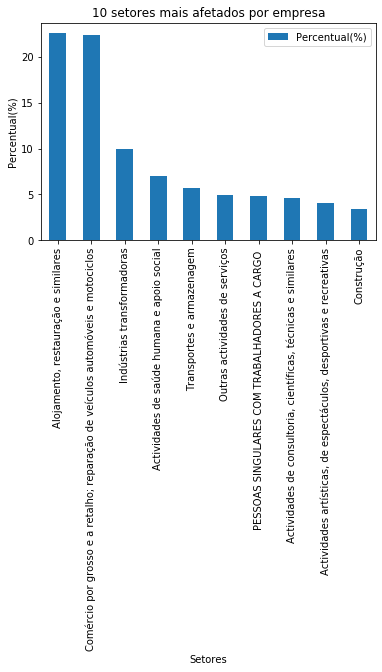

In [20]:
#present a bar chart of the 10 most affected sectors by companies
df_plot10=df_setor.head(10)
df_plot10.plot(kind='bar',x='Setor',y='Percentual(%)')
plt.title('10 setores mais afetados por empresa')
plt.xlabel('Setores')
plt.ylabel('Percentual(%)')
plt.show()

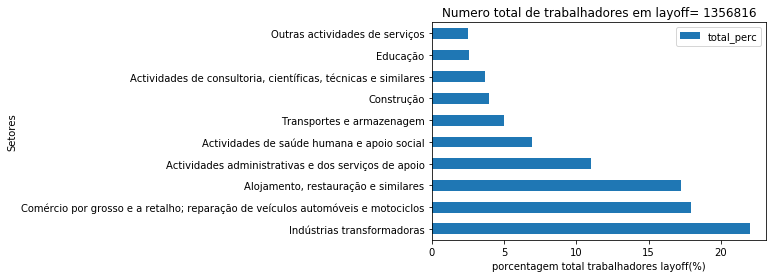

In [21]:
#data analysis by amount of workers
df_workers=df_work[['Setor','Nº TRABALHADORES','Feminino','Masculino']]
df_workers=df_workers.sort_values(by=['Nº TRABALHADORES'],ascending=False)

#Calculate percentage of total workers affected
total_worker=sum(df_workers['Nº TRABALHADORES'])
df_workers['total_perc']=[(float(value) / total_worker) for value in df_workers['Nº TRABALHADORES']]
df_workers['total_perc']=df_workers['total_perc']*100
df_workers['total_perc']=df_workers['total_perc'].round(3)
df_workers

#Calculate percentage of female workers affected
total_female=sum(df_workers['Feminino'])
df_workers['fem_perc']=[(float(value) / total_female) for value in df_workers['Feminino']]
df_workers['fem_perc']=df_workers['fem_perc']*100
df_workers['fem_perc']=df_workers['fem_perc'].round(3)
df_workers

#Calculate percentage of male workers affected
total_male=sum(df_workers['Masculino'])
df_workers['male_perc']=[(float(value) / total_male) for value in df_workers['Masculino']]
df_workers['male_perc']=df_workers['male_perc']*100
df_workers['male_perc']=df_workers['male_perc'].round(3)

#Rearrange colums
df_workers=df_workers[['Setor','Nº TRABALHADORES','total_perc','Feminino','fem_perc','Masculino','male_perc']]

#present a bar chart of the 10 industries that presented a higher amount of workers on layoff
df_work10=df_workers.head(10)
df_work10.plot(kind='barh',x='Setor',y='total_perc')
plt.title('Numero total de trabalhadores em layoff= '+str(total_worker))
plt.ylabel('Setores')
plt.xlabel('porcentagem total trabalhadores layoff(%)')
plt.show()

Text(0.5, 0, 'Setores')

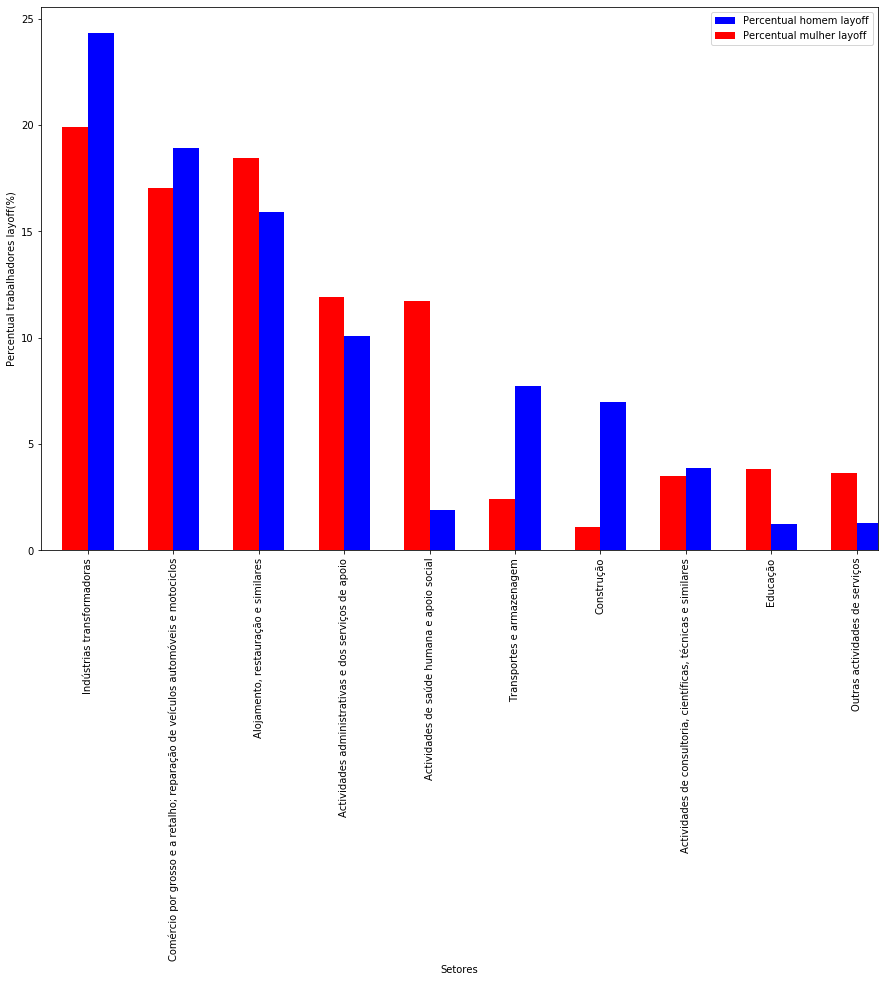

In [22]:
#Present a chart presenting  percentage of women and men layoff
#take men info
df_men=df_work10[['Setor','Masculino','male_perc']]
#take women info
df_women=df_work10[['Setor','Feminino','fem_perc']]

#Create bar chart
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes


width =0.3

df_men.plot(kind='bar',x='Setor', y='male_perc', color='blue', ax=ax, width=width, position=0,label='Percentual homem layoff',figsize=(15, 10))
df_women.plot(kind='bar',x='Setor', y='fem_perc', color='red', ax=ax, width=width, position=1,label='Percentual mulher layoff',figsize=(15, 10))

ax.set_ylabel('Percentual trabalhadores layoff(%)')
ax.set_xlabel('Setores')

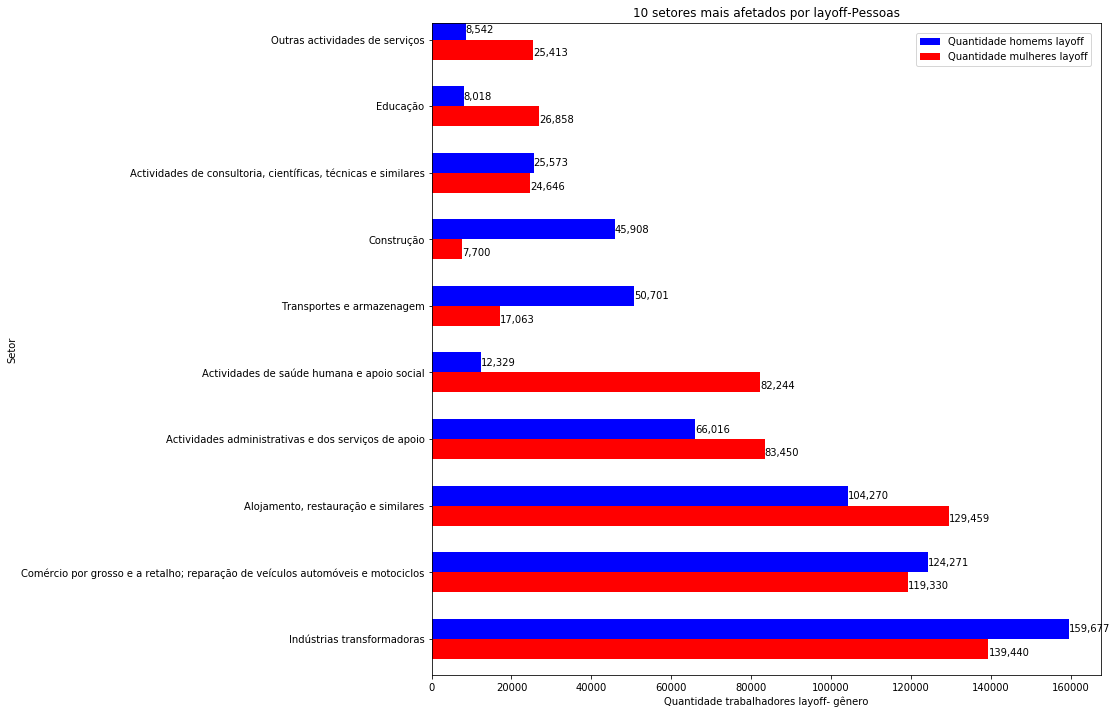

In [23]:
# Extract information relative to top 10 industries for men on layoff
df_label=df_men[['Setor','Masculino']]
df_label=df_label.reset_index()
df_label=df_label.set_index('Setor')
df_label_men=df_label['Masculino']

# Extract information relative to top 10 industries for women on layoff
df_label2=df_women[['Setor','Feminino']]
df_label2=df_label2.reset_index()
df_label2=df_label2.set_index('Setor')
df_label_women=df_label2['Feminino']

#Graphic with 10 most affected sectors 

plt.xlabel('Quantidade trabalhadores layoff- gênero')
plt.ylabel('Setor')
plt.title('10 setores mais afetados por layoff-Pessoas')

# Separation between bars
width =0.3

# print bar chart for men and women
df_label_men.plot(kind='barh', color='blue',  width=width, position=0,label='Percentagem homem layoff',figsize=(12, 12))
df_label_women.plot(kind='barh', color='red', width=width, position=1,label='Percentagem mulher layoff',figsize=(12, 12))

#print legend
gender=['Quantidade homems layoff','Quantidade mulheres layoff']

# annotate value labels to men (amount of unemployed)
for index, value in enumerate(df_label_men): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value, index + 0.1), color='black')

    # annotate value labels to women (amount of unemployed)
for index, value in enumerate(df_label_women): 
    label2 = format(int(value), ',') 
    plt.annotate(label2, xy=(value, index -0.25), color='black')

#present legends at top right corner
plt.legend(gender,bbox_to_anchor=(1, 1), loc=1, borderaxespad=1)
#show graph
plt.show()

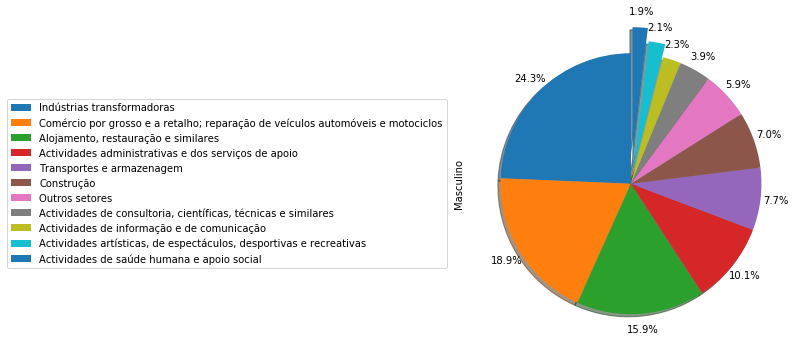

In [24]:
# Make a pie chart with the 10 most affected sectors, plus presenting an 11th sector with the sum of the other sectors affected
#For male situation
#Select the needed information
df_pie=df_workers[['Setor','Masculino']]
#sort values by the number of unemployed males
df_pie=df_pie.sort_values(by=['Masculino'],ascending=False)
#calculate the sum of the other sectors affected
outros_setores=sum(df_pie['Masculino'].tail(11))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','index':0,'Masculino':outros_setores})
#Append the new row to the existing information
df_pie=df_pie.append(new_row, ignore_index=True)
#sort values again by number of unemployed males
df_pie=df_pie.sort_values(by=['Masculino'],ascending=False)
#clean the data
df_pie=df_pie.reset_index()
df_pie=df_pie.set_index('Setor')
df_pie=df_pie.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 11 rows (10 sectors more affected + other sectors)
df_pie_men=df_pie['Masculino']
df_pie_top=df_pie_men.head(11)

#Generate the pie chart
#Generate and explode list to enhance visuals and present the information in a more clear way
explode_list = [0, 0, 0, 0, 0, 0,0,0,0,0.1,0.2] 

#present the pie chart using the dataframe created previously
df_pie_top.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            explode=explode_list
                            )
#Present legends for identification of different sectors
plt.legend(df_pie_top.index, loc='center right',bbox_to_anchor=(-0.55, 0, 0.5, 1))

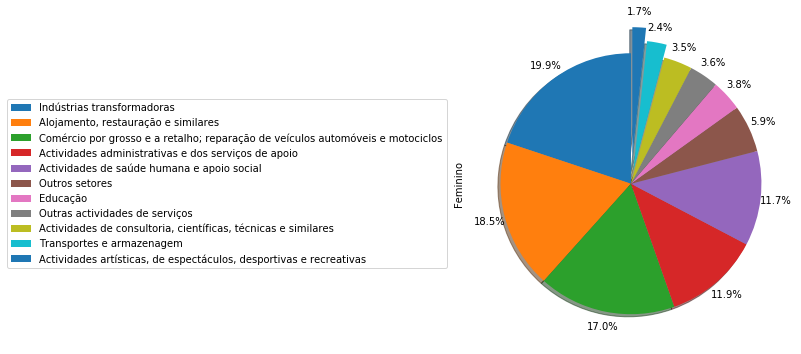

In [25]:
# Make a pie chart with the 10 most affected sectors, plus presenting an 11th sector with the sum of the other sectors affected
#For female situation
#Select the needed information
df_pie_f=df_workers[['Setor','Feminino']]
#sort values by the number of unemployed females
df_pie_f=df_pie_f.sort_values(by=['Feminino'],ascending=False)
#calculate the sum of the other sectors affected
outros_setores=sum(df_pie_f['Feminino'].tail(11))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','index':0,'Feminino':outros_setores})
#Append the new row to the existing information
df_pie_f=df_pie_f.append(new_row, ignore_index=True)
#sort values again by number of unemployed females
df_pie_f=df_pie_f.sort_values(by=['Feminino'],ascending=False)
#clean the data
df_pie_f=df_pie_f.reset_index()
df_pie_f=df_pie_f.set_index('Setor')
df_pie_f=df_pie_f.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 11 rows (10 sectors more affected + other sectors)
df_pie_women=df_pie_f['Feminino']
df_pie_top_w=df_pie_women.head(11)

#Generate the pie chart
#Generate and explode list to enhance visuals and present the information in a more clear way
explode_list = [0, 0, 0, 0, 0, 0,0,0,0,0.1,0.2] 

#present the pie chart using the dataframe created previously
df_pie_top_w.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            explode=explode_list
                            )
#Present legends for identification of different sectors
plt.legend(df_pie_top_w.index, loc='center right',bbox_to_anchor=(-0.55, 0, 0.5, 1))

In [26]:
#ANALYSIS BY ORGANIZATION DIMENSION

#Create a waffle chart to show distribution of affectance by oganization dimension
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_size.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )


In [27]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_size.index.values# categories
values = df_size['Percentual(%)'].round(3)# correponding values of categories

colormap = plt.cm.PRGn # color map class

In [28]:
create_waffle_chart(categories, values, height, width, colormap)

Total number of tiles is 400


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [34]:
#ANALYSIS BY REGION
import json

#import the Portugal Json file
with urlopen('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/portugal/portugal-districts.json') as response:
    portugal_geo = json.load(response)

#Get latitude and longitude of Portugal
Portugalcoordinates=(39.399,-8.224)

#Divide into 2 sections, continental and islands
df_continental=df_region.iloc[0:18]
df_island=df_region.iloc[18:22]

df_continental['Latitude']=['40.644','38.015','41.503','41.805','39.823','40.205','38.566','37.019','40.537','39.744','38.716','39.291',
                         '41.149','39.135','38.524','41.644','41.295','40.657']
df_continental['Longitude']=['-8.6455','-7.865','-8.420','-6.757','-7.491','-8.419','-7.900','7.932','-7.265','-8.807','-9.133',
                            '-7.432','-8.610','-8.405','-8.893','-8.830','-7.746','-7.914']
df_continental['Latitude']=df_continental['Latitude'].astype(float)
df_continental['Longitude']=df_continental['Longitude'].astype(float)

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [35]:
# creation of the map
map1 = folium.Map(location=Portugalcoordinates, zoom_start=6)

# instantiate a feature group for the incidents in the dataframe
feature = folium.map.FeatureGroup()



for lat, lng, in zip(df_continental.Latitude,df_continental.Longitude):
    feature.add_child(
        folium.CircleMarker(
            location=[lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
             fill_opacity=0.6))
    


# add pop-up text to each marker on the map
latitudes = list(df_continental.Latitude)
longitudes = list(df_continental.Longitude)
labels = list(df_continental['N° Empresas'])


for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map1)
    
#add incidents to map
map1.add_child(feature)

#### Redução de Actividade TI e MOE

In [36]:
reducao_atividade_completa=all_my_sheets[5]
# Drop rows with no info
reducao_atividade_completa.dropna(subset=reducao_atividade_completa.columns[1:13], how='all',inplace=True)
# Reset indexes
reducao_atividade_completa.reset_index(drop=True, inplace=True)

In [37]:
# Get indexes that separate tables
import numpy as np
m = np.concatenate(( [True], pd.isnull(reducao_atividade_completa.iloc[:,0]), [True] )) 
indexes = np.flatnonzero(m[1:] != m[:-1])

In [38]:
# Separate tables according to indexes
reducao_atividade_byday = reducao_atividade_completa[indexes[0]:indexes[1]]
reducao_atividade_bydistrict = reducao_atividade_completa[indexes[2]-2:indexes[3]] #-1 if older xls
reducao_atividade_bysex = reducao_atividade_completa[indexes[4]:indexes[5]]

# Checks if there is an empty space in the first column
# if pd.isnull(reducao_atividade_completa.iat[indexes[2],1]):
# else:
# reducao_atividade_byday=pd.concat([reducao_atividade_byday,reducao_atividade_completa[indexes[2]:indexes[3]]])
# reducao_atividade_bydistrict = reducao_atividade_completa[indexes[4]-2:indexes[5]]
# reducao_atividade_bysex = reducao_atividade_completa[indexes[6]:indexes[7]]

In [39]:
# Clean byday table 
reducao_atividade_byday.columns = ['DATA', 'TI_ParagemTotal', 'TI_Reducao','TI_Total', 'PRO_TI_ParagemTotal', 'PRO_TI_Reducao','PRO_TI_Total', 'MOE_ParagemTotal', 'MOE_Reducao','MOE_Total', 'PRO_MOE_ParagemTotal', 'PRO_MOE_Reducao','PRO_MOE_Total']

# Formatting the date - sometimes some values are already of data type
date_inds=pd.notnull(pd.to_datetime(reducao_atividade_byday['DATA'],errors='coerce'))
if date_inds.index[date_inds].size > 0:
    reducao_atividade_byday['DATA'][date_inds]=reducao_atividade_byday['DATA'][date_inds].dt.strftime('%d/%b')
reducao_atividade_byday['DATA'] = reducao_atividade_byday['DATA'].apply(dateparser.parse,date_formats=['%d/%b'])

# Remove columns that dont have datetype in DATA, for example columns with the TOTAL
reducao_atividade_byday.dropna(subset=['DATA'],inplace=True)
# Reset indexes
reducao_atividade_byday.reset_index(drop=True, inplace=True)

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [40]:
reducao_atividade_byday

,DATA,TI_ParagemTotal,TI_Reducao,TI_Total,PRO_TI_ParagemTotal,PRO_TI_Reducao,PRO_TI_Total,MOE_ParagemTotal,MOE_Reducao,MOE_Total,PRO_MOE_ParagemTotal,PRO_MOE_Reducao,PRO_MOE_Total
0,2020-04-01,64088,NaN,64088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-02,22496,NaN,22496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-03,12398,NaN,12398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-04,3558,NaN,3558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-05,2459,NaN,2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-04-06,11731,NaN,11731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-04-07,8516,NaN,8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-04-08,6161,NaN,6161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-04-09,6018,NaN,6018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-04-10,1937,NaN,1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
base = alt.Chart(reducao_atividade_byday).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='TI_ParagemTotal').properties(title='TI Paragem Total') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

In [ ]:
# Clean bysex table 
reducao_atividade_bysex=reducao_atividade_bysex.dropna(axis=1)
reducao_atividade_bysex.columns=['TipoPedido','Total','Feminino','Masculino']
reducao_atividade_bysex.reset_index(drop=True, inplace=True)

In [43]:
reducao_atividade_bysex

,NÚMERO DE PEDIDOS DAS MEDIDAS DE APOIO EXTRAORDINÁRIO À REDUÇÃO DA ATIVIDADE ECONÓMICA DE:,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10
40,TOTAL,191128,112565,48814,16380,4171
41,AVEIRO,13313,8196,3119,785,144
42,BEJA,2394,1522,449,92,17
43,BRAGA,15401,10112,3827,1174,234
44,BRAGANÇA,2731,1781,540,86,16
45,CASTELO BRANCO,2845,1714,614,186,49
46,COIMBRA,7041,4100,1587,550,134
47,ÉVORA,2567,1603,623,170,39
48,FARO,13222,7692,3393,831,215
49,GUARDA,2588,1625,530,131,28


In [ ]:
# Clean bydistrict table 
reducao_atividade_bydistrict.reset_index(drop=True, inplace=True)
# Find columns corresponding to the total counts
checknull=reducao_atividade_bydistrict.iloc[0].notnull() 
checknull[0]=True
checknull.array
reducao_atividade_bydistrict=reducao_atividade_bydistrict.loc[:, checknull]
# Remove rows with nans
reducao_atividade_bydistrict.dropna(inplace=True)
# Rename columns
reducao_atividade_bydistrict.columns = ['Distrito', 'TI', 'PRORROGAÇÃO_TI', 'MOE', 'PRORROGAÇÃO_MOE']
# Reset indexes
reducao_atividade_bydistrict.reset_index(drop=True, inplace=True)

#### Despedimentos coletivos

In [45]:
despedimentos=all_my_sheets[6]
# Drop first column which is empty
despedimentos=despedimentos.drop(despedimentos.columns[0],axis=1)
# Drop rows with nan
despedimentos.dropna(inplace=True)
despedimentos.reset_index(drop=True, inplace=True)
# Rename columns
despedimentos.columns = ['DATA', 'COLETIVOS_TOTAL', 'COLETIVOS_MICRO','TRABALHADORES_TOTAL', 'TRABALHADORES_MICRO']

In [46]:
despedimentos

,DATA,COLETIVOS_TOTAL,COLETIVOS_MICRO,TRABALHADORES_TOTAL,TRABALHADORES_MICRO
0,2020-03-01,0,0,0,0
1,2020-03-02,0,0,0,0
2,2020-03-03,1,1,4,4
3,2020-03-04,2,1,8,4
4,2020-03-05,4,3,16,12
...,...,...,...,...,...
89,2020-05-29,57,21,539,83
90,2020-05-30,57,21,539,83
91,2020-05-31,57,21,539,83
92,2020-06-01,3,0,180,0


In [47]:
base = alt.Chart(despedimentos).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='COLETIVOS_TOTAL').properties(title='COLETIVO TOTAL') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

In [48]:
base = alt.Chart(despedimentos).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='TRABALHADORES_TOTAL').properties(title='TRABALHADORES TOTAL') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)